In [0]:
import numpy as np
from numpy.linalg import matrix_power
import functools

## Условие

In [2]:
# Хохлосюк
# A = np.array([[3,-2,2],[0.1,1.8,-1.7],[-0.9,1.8,-1.7]])
# m = 3.0

# Сережа
# A = np.array([[-3, 4, -4],[-3, 5, -5],[-1, 2, -2]])
# m = 12.0

# Ира
A = np.array([[-2, 3.5, -3.5],[-3.5, 6.75, -7],[-1.75, 3.5, -3.75]])
m = 7.0

print('m =', m)
print(A)

m = 7.0
[[-2.    3.5  -3.5 ]
 [-3.5   6.75 -7.  ]
 [-1.75  3.5  -3.75]]


## Пункт 1-2

In [3]:
ev = np.linalg.eig(A)
print('Собственные значения:\n', ev[0])
print('Собственные векторы:\n', ev[1])

Собственные значения:
 [ 1.5  -0.25 -0.25]
Собственные векторы:
 [[ 0.40824829  0.36033146  0.26027455]
 [ 0.81649658 -0.56334325  0.74469696]
 [ 0.40824829 -0.74350899  0.61455968]]


## Пункт 3

In [4]:
if (np.max(ev[0]) < 1):
    print('Устойчивая система')
if (np.max(ev[0]) == 1):
    print('Система на границе устойчивости')
if (np.max(ev[0]) > 1):
    print('Неустойчивая система')

Неустойчивая система


## Пункт 4

In [5]:
epsilon = 0.0001
k = 1 / (np.max(ev[0]) + epsilon)
A_hat = A * k
print('Скорректированная матрица:')
print(A_hat)

Скорректированная матрица:
[[-1.33324445  2.33317779 -2.33317779]
 [-2.33317779  4.49970002 -4.66635558]
 [-1.16658889  2.33317779 -2.49983334]]


In [6]:
ev_hat = np.linalg.eig(A_hat)
print('Собственные значения скорректированной матрицы:\n', ev_hat[0])
print('Собственные векторы скорректированной матрицы:\n', ev_hat[1])

Собственные значения скорректированной матрицы:
 [ 0.99993334 -0.16665556 -0.16665556]
Собственные векторы скорректированной матрицы:
 [[ 0.40824829 -0.88748583 -0.49085225]
 [ 0.81649658  0.01678626 -0.7264295 ]
 [ 0.40824829  0.46052917 -0.48100338]]


## Пункт 5

#### Выбираем соответствующие собственные вектора:

In [7]:
def desc_eig(v):
    if (v < 0):
        return 'с асимптотически убывающими состояниями, т.к. соответствующее собственное значение меньше 1'
    if (v == 1):
        return 'с равномерно ограниченными состояниями, т.к. соответствующее собственное значение равно 1'
    return 'с асимптотически возрастающими состояниями, т.к. соответствующее собственное значение больше 1'

for i in range(3):
    print('При Xo =', ev[1][i], 'система', desc_eig(ev[0][i]), '\n')

При Xo = [0.40824829 0.36033146 0.26027455] система с асимптотически возрастающими состояниями, т.к. соответствующее собственное значение больше 1 

При Xo = [ 0.81649658 -0.56334325  0.74469696] система с асимптотически убывающими состояниями, т.к. соответствующее собственное значение меньше 1 

При Xo = [ 0.40824829 -0.74350899  0.61455968] система с асимптотически убывающими состояниями, т.к. соответствующее собственное значение меньше 1 



## Пункт 6

In [8]:
np.linalg.matrix_power(A, 1)

array([[-2.  ,  3.5 , -3.5 ],
       [-3.5 ,  6.75, -7.  ],
       [-1.75,  3.5 , -3.75]])

In [9]:
np.linalg.matrix_power(A, 2)

array([[-2.125 ,  4.375 , -4.375 ],
       [-4.375 ,  8.8125, -8.75  ],
       [-2.1875,  4.375 , -4.3125]])

In [10]:
np.linalg.matrix_power(A, 3)

array([[ -3.40625 ,   6.78125 ,  -6.78125 ],
       [ -6.78125 ,  13.546875, -13.5625  ],
       [ -3.390625,   6.78125 ,  -6.796875]])

In [11]:
np.linalg.matrix_power(A, 200)

array([[-1.65291991e+35,  3.30583982e+35, -3.30583982e+35],
       [-3.30583982e+35,  6.61167964e+35, -6.61167964e+35],
       [-1.65291991e+35,  3.30583982e+35, -3.30583982e+35]])

In [12]:
np.linalg.matrix_power(A_hat, 1)

array([[-1.33324445,  2.33317779, -2.33317779],
       [-2.33317779,  4.49970002, -4.66635558],
       [-1.16658889,  2.33317779, -2.49983334]])

In [13]:
np.linalg.matrix_power(A_hat, 2)

array([[-0.94431853,  1.94418521, -1.94418521],
       [-1.94418521,  3.9161445 , -3.88837042],
       [-0.97209261,  1.94418521, -1.91641114]])

In [14]:
np.linalg.matrix_power(A_hat, 3)

array([[-1.00905743,  2.00885746, -2.00885746],
       [-2.00885746,  4.01308622, -4.01771492],
       [-1.00442873,  2.00885746, -2.01348616]])

In [15]:
np.linalg.matrix_power(A_hat, 200)

array([[-0.9867556,  1.9735112, -1.9735112],
       [-1.9735112,  3.9470224, -3.9470224],
       [-0.9867556,  1.9735112, -1.9735112]])

#### Скорректированная матрица стремится к 0, когда как исходная матрица стремится к бесконечности

## Пункт 7

1) Дискретная

In [16]:
A = np.array(A)
X = [ev[1][1]]
n = 20

print('n =', n)
print('X0 =', X[0])

n = 20
X0 = [ 0.81649658 -0.56334325  0.74469696]


In [17]:
f = []
f.append(np.array([1,1,1]))
for i in range(1, 21):
  f.append(m / (i**2) * f[i - 1])
  print('f(%d) = ' % i, str(f[i]))

f(1) =  [7. 7. 7.]
f(2) =  [12.25 12.25 12.25]
f(3) =  [9.52777778 9.52777778 9.52777778]
f(4) =  [4.16840278 4.16840278 4.16840278]
f(5) =  [1.16715278 1.16715278 1.16715278]
f(6) =  [0.22694637 0.22694637 0.22694637]
f(7) =  [0.03242091 0.03242091 0.03242091]
f(8) =  [0.00354604 0.00354604 0.00354604]
f(9) =  [0.00030645 0.00030645 0.00030645]
f(10) =  [2.14513355e-05 2.14513355e-05 2.14513355e-05]
f(11) =  [1.24098635e-06 1.24098635e-06 1.24098635e-06]
f(12) =  [6.03257253e-08 6.03257253e-08 6.03257253e-08]
f(13) =  [2.49869868e-09 2.49869868e-09 2.49869868e-09]
f(14) =  [8.92392386e-11 8.92392386e-11 8.92392386e-11]
f(15) =  [2.77633187e-12 2.77633187e-12 2.77633187e-12]
f(16) =  [7.59153245e-14 7.59153245e-14 7.59153245e-14]
f(17) =  [1.83877949e-15 1.83877949e-15 1.83877949e-15]
f(18) =  [3.97267173e-17 3.97267173e-17 3.97267173e-17]
f(19) =  [7.70324158e-19 7.70324158e-19 7.70324158e-19]
f(20) =  [1.34806728e-20 1.34806728e-20 1.34806728e-20]


In [18]:
Xn = matrix_power(A, n).dot(X[0]) + sum([matrix_power(A, n-k-1).dot(f[k]) for k in range(n)])
print('X(%d) = ' % 20, str(Xn))

X(20) =  [-44518.70872792 -89037.41745584 -44518.70872792]


In [19]:
print('X(%d) = ' % 0, str(X[0]))
for i in range(1, 21):
  X.append(A.dot(X[i-1]) + f[i-1])
  print('X(%d) = ' % i, str(X[i]))

X(0) =  [ 0.81649658 -0.56334325  0.74469696]
X(1) =  [ -5.2111339 -10.8731837  -5.193184 ]
X(2) =  [ -2.45773116 -11.80273334  -2.46221864]
X(3) =  [-15.52633916 -41.58086057 -15.52521729]
X(4) =  [ -50.61429536 -108.12432294  -50.61457583]
X(5) =  [ -95.88712139 -194.2187125   -95.88705127]
X(6) =  [-151.21941874 -302.99487283 -151.21943627]
X(7) =  [-228.5482441  -457.18442574 -228.54823972]
X(8) =  [-343.09774196 -686.20592044 -343.09774305]
X(9) =  [ -514.67959091 -1029.36011872  -514.67959063]
X(10) =  [ -772.02236004 -1544.04479231  -772.02236011]
X(11) =  [-1158.03377115 -2316.06754569 -1158.03377113]
X(12) =  [-1737.05066743 -3474.10133525 -1737.05066743]
X(13) =  [-2605.57600244 -5211.15200484 -2605.57600244]
X(14) =  [-3908.36400353 -7816.72800706 -3908.36400353]
X(15) =  [ -5862.54600533 -11725.09201065  -5862.54600533]
X(16) =  [ -8793.81900798 -17587.63801597  -8793.81900798]
X(17) =  [-13190.72851198 -26381.45702395 -13190.72851198]
X(18) =  [-19786.09276796 -39572.18553

2) Непрерывная

In [0]:
import scipy.integrate as integrate
import scipy.special as special
from scipy.integrate import quad
from scipy.linalg import expm
from numpy import sqrt, sin, cos, pi
from numpy import vectorize

def integrand(x, A, t, m):
  return expm(A * (t - x)).dot(np.array([(m + 10)/m, 1/m, 2/m])) * sin(x * (m+1) / m + pi * 0.25)

t = 1

In [21]:
def compute(A, t, m, nbins=10000):
    f = lambda x: integrand(x, A, t, m)
    xv = np.linspace(0, t, nbins)
    result = np.apply_along_axis(f, 0, xv.reshape(1,-1))
    return np.trapz(result,xv)
 
I = compute(A, 1, m)

print('Значение интеграла:')
print(I)

Значение интеграла:
[-1.39501531 -6.66779749 -3.15763662]


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

Графики вектора подинтегрального выражения:


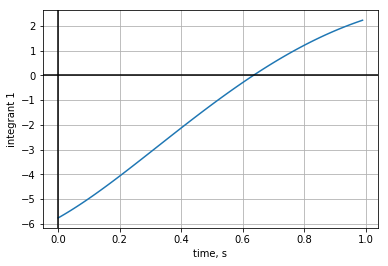

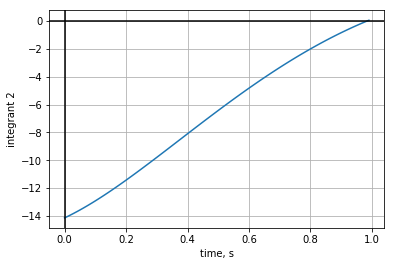

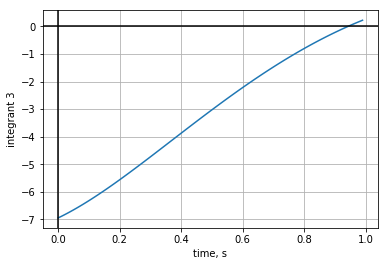

In [23]:
t_arr = np.arange(0., 1., 0.01)

print('Графики вектора подинтегрального выражения:')

for j in range(3):
  plt.plot(t_arr, [integrand(i, A, t, m)[j] for i in t_arr])
  plt.grid(True, which='both')
  plt.axhline(y=0, color='k')
  plt.axvline(x=0, color='k')
  plt.xlabel('time, s')
  plt.ylabel('integrant %d' % (j + 1))
  plt.show()

In [24]:
y0 = ev[1][1]
yt = expm(A * t).dot(y0) + I

print('y(t) =', yt)

y(t) = [-13.46957632 -32.52742802 -15.28811522]
